# Boosting and Classification:

Data: The data we will use has been taken from here: https://archive.ics.uci.edu/ml/datasets/AdultLinks to an external site.

There will be some basic preprocessing work to do, some of which is outlined. But please post on Canvas as questions arise. The goal of this homework is to take census data and predict whether an individual would have an income that exceeds $50k/yr. This is a binary classification problem.


# 1. Data Processing

a) Import the data from the website directly: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.dataLinks to an external site.

We can use pandas to read the data that is stored in csv format. Please note there is no header, so we will build column names in a later step. Also, we are going to remove leading white spaces (which just make things tough later)

b) There is no header included, but information on column names is here: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.namesLinks to an external site.

Scroll to the bottom of that link to see the explanation of the columns. You need to build the column names for your dataframe. It is highly encouraged to not include spaces in column names. Finally, call your target variable (the last column of ">50K" or "<=50k") "salary".

An easy way to do this is to build a list of column names, and pass those into the .columns() attribute.

Example below:

list_of_columns = ["column_a", "column_b", "column_c"]
my_dataframe.columns = list_of_columns

In [1]:
import pandas as pd
import numpy as np

# Path to the downloaded dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Define column names based on the dataset description and recommendations
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'salary'
]

# Import the data with pandas, remove leading whitespaces, and assign column names
adult_df = pd.read_csv(url, header=None, names=column_names, skipinitialspace=True)

adult_df


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


c) Check your dataframe shape to verify that you have the correct # of rows and columns. Run the following command:

In [2]:
adult_df.shape

(32561, 15)

d) Drop the 3rd column from the data (it is referred to as "fnlwgt" on UCI's website and is not necessary in this homework)

In [3]:
adult_df=adult_df.drop('fnlwgt', axis=1)


e) Note: There are random values of  '?' that show up in the data - this is fine! These just refer to "unknown" and can be left as is. This data has no true NA values, so no need to check.

f) Use the .replace() method to make the following changes to the "salary" column:

 "<=50K" should become 0
">50K" should become 1
Note: This step is essential to calculate the ROC_AUC score in model evaluation steps.

In [4]:
adult_df['salary']=adult_df['salary'].replace({'<=50K': 0, '>50K': 1})
adult_df['salary'].head()

0    0
1    0
2    0
3    0
4    0
Name: salary, dtype: int64

g) Create your X dataframe (just your predictors). It should include every feature except for the target variable which is "salary".

You should have the following shape: (32561, 13)

In [5]:
X= adult_df.drop('salary', axis=1)
print(X.shape)

(32561, 13)


h) Create your y dataframe (just your target variable). It should only be "salary".

You should have the following shape: (32561, )

The values should only be 0 and 1.

In [6]:
y= adult_df['salary']
print(y.shape)

(32561,)


i) For this homework we will try converting columns with factors to separate columns (i.e. one-hot encoding). It is not necessary for trees, but can be a very powerful tool to use. There are a variety of ways to do this, but we can use Pandas built-in method .get_dummies(). Pandas will automatically split out columns that are categorical. For now, just run across your full X dataframe.

In [7]:
# Apply one-hot encoding to the DataFrame X using get_dummies
X_encoded = pd.get_dummies(X)

print("Shape of X_encoded:", X_encoded.shape)
print("Shape of X:", X.shape)

Shape of X_encoded: (32561, 107)
Shape of X: (32561, 13)


j) Split data into train / test set using an 70/30 split. Verify that you have the same number of columns in your X_train and X_test.



In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.30, random_state=42)

# Verify that X_train and X_test have the same number of columns
print("Number of columns in X_train:", X_train.shape[1])
print("Number of columns in X_test:", X_test.shape[1])

# Optional: Print the shapes of the train and test data to confirm the size
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Number of columns in X_train: 107
Number of columns in X_test: 107
Shape of X_train: (22792, 107)
Shape of X_test: (9769, 107)
Shape of y_train: (22792,)
Shape of y_test: (9769,)


# 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters - this will let us compare Boosting methods to Random Forest in binary classification problems.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [9]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score

rf_classifier= RandomForestClassifier(random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [10]:
# Predict the classes and the probabilities for the test data
y_pred = rf_classifier.predict(X_test)
y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# Print the first few predictions and probabilities
print("Predicted classes:", y_pred[:5])
print("Predicted probabilities:", y_proba[:5])

Predicted classes: [0 1 1 0 0]
Predicted probabilities: [0.         0.65166667 0.749      0.         0.04      ]


c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

d) Calculate the AUC score.

In [11]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8464530658204524
ROC AUC Score: 0.8889081826018049


e) Identify the top 5 features. Feel free to print a list OR to make a plot.


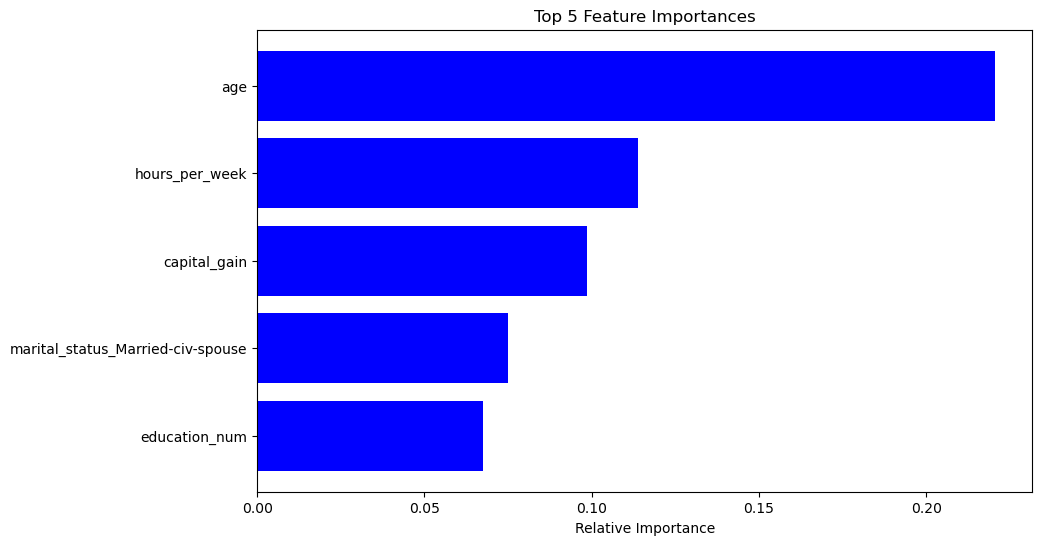

Top 5 Features:
education_num: 0.0673
marital_status_Married-civ-spouse: 0.0751
capital_gain: 0.0986
hours_per_week: 0.1137
age: 0.2206


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the Random Forest model
importances = rf_classifier.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(importances)[-5:]

# Create a plot of feature importances
plt.figure(figsize=(10, 6))
plt.title('Top 5 Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_encoded.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Alternatively, print them as a list
print("Top 5 Features:")
for i in indices:
    print(f"{X_encoded.columns[i]}: {importances[i]:.4f}")


f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?

In [13]:
from sklearn.metrics import classification_report

# Predict on the training data
y_train_pred = rf_classifier.predict(X_train)

# Classification report for the training data
train_report = classification_report(y_train, y_train_pred)
print("Classification Report for Training Data:")
print(train_report)

# Classification report for the test data
test_report = classification_report(y_test, y_pred)
print("Classification Report for Test Data:")
print(test_report)


Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17265
           1       0.97      0.95      0.96      5527

    accuracy                           0.98     22792
   macro avg       0.98      0.97      0.97     22792
weighted avg       0.98      0.98      0.98     22792

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      7455
           1       0.70      0.62      0.66      2314

    accuracy                           0.85      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



the model performs exceptionally well on the training data (higher accuracy, precision, recall, or F1-scores compared to test data), it may be overfitting

# 3. AdaBoost Classifier - GridSearch:

Start by creating a simple AdaBoostClassifier only using default parameters.

(Note: sklearn defaults to a max_depth of 1 for AdaBoost. Read more in the documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.htmlLinks to an external site.).

a) Use the AdaBoostClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following:

n_estimators: 100, 200, 300, 400
learning_rate: 0.2,0.4,0.6,0.8,1, 1.2

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Initialize AdaBoostClassifier with the default base estimator (DecisionTree with max_depth=1)
ada_classifier = AdaBoostClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2]
}

# Initialize GridSearchCV with the AdaBoost classifier, parameter grid, and necessary settings
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, scoring='roc_auc', verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

# Optionally, get the best estimator directly
best_ada_classifier = grid_search.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   2.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   2.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   2.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   2.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   2.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   5.2s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   5.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   7.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   6.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=200; total time=   7.0s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=300; total time=   8.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=300; total time=   7.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=300; total time=   9.2s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=300; total time=   8.5s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=300; total time=   8.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=400; total time=  13.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=400; total time=  10.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=400; total time=  11.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=400; total time=  11.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.2, n_estimators=400; total time=  11.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=100; total time=   2.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=100; total time=   2.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=100; total time=   2.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=100; total time=   3.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=100; total time=   2.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=200; total time=   6.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=200; total time=   6.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=200; total time=   6.5s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=200; total time=   6.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=200; total time=   6.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=300; total time=   9.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=300; total time=   9.5s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=300; total time=   9.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=300; total time=  10.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=300; total time=   9.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=400; total time=  12.2s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=400; total time=  10.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=400; total time=   9.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=400; total time=  11.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.4, n_estimators=400; total time=  14.0s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=100; total time=   2.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=100; total time=   3.2s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=100; total time=   2.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=100; total time=   3.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=100; total time=   2.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=200; total time=   9.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=200; total time=   7.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=200; total time=   7.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=200; total time=   8.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=200; total time=   5.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=300; total time=   9.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=300; total time=  11.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=300; total time=  11.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=300; total time=   9.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=300; total time=   9.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=400; total time=  13.2s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=400; total time=  13.0s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=400; total time=  13.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=400; total time=  15.0s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.6, n_estimators=400; total time=  13.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=100; total time=   2.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=100; total time=   3.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=100; total time=   3.5s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=100; total time=   3.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=100; total time=   3.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=200; total time=   7.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=200; total time=   8.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=200; total time=   6.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=200; total time=   7.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=200; total time=   6.0s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=300; total time=   9.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=300; total time=  11.2s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=300; total time=  11.5s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=300; total time=   8.2s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=300; total time=  11.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=400; total time=  12.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=400; total time=  13.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=400; total time=  14.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=400; total time=  11.0s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.8, n_estimators=400; total time=  12.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   2.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   3.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=100; total time=   4.0s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   7.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   6.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   6.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   5.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=200; total time=   5.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=  10.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=   9.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=  10.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=  11.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=300; total time=  10.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  11.5s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  12.5s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  12.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  14.2s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ..................learning_rate=1, n_estimators=400; total time=  13.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=100; total time=   3.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=100; total time=   3.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=100; total time=   2.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=100; total time=   3.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=100; total time=   3.9s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=200; total time=   5.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=200; total time=   6.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=200; total time=   6.5s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=200; total time=   6.1s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=200; total time=   6.8s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=300; total time=   9.7s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=300; total time=  10.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=300; total time=  11.0s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=300; total time=   9.3s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=300; total time=   8.4s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=400; total time=  11.5s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=400; total time=  11.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=400; total time=  10.6s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=400; total time=  11.0s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.2, n_estimators=400; total time=  10.2s


/Users/colleenjung/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best parameters: {'learning_rate': 1.2, 'n_estimators': 400}
Best ROC AUC score: 0.9253193104965561


b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Predict the classes and probabilities for the test data
y_pred = best_ada_classifier.predict(X_test)
y_proba = best_ada_classifier.predict_proba(X_test)[:, 1]  # get probabilities for the positive class



c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

d) Calculate the AUC score

In [17]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc_score)


Confusion Matrix:
 [[7008  447]
 [ 807 1507]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.77      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.83      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769

AUC Score: 0.9244122180504519


e) Identify the top 5 features. Feel free to print a list OR to make a plot.


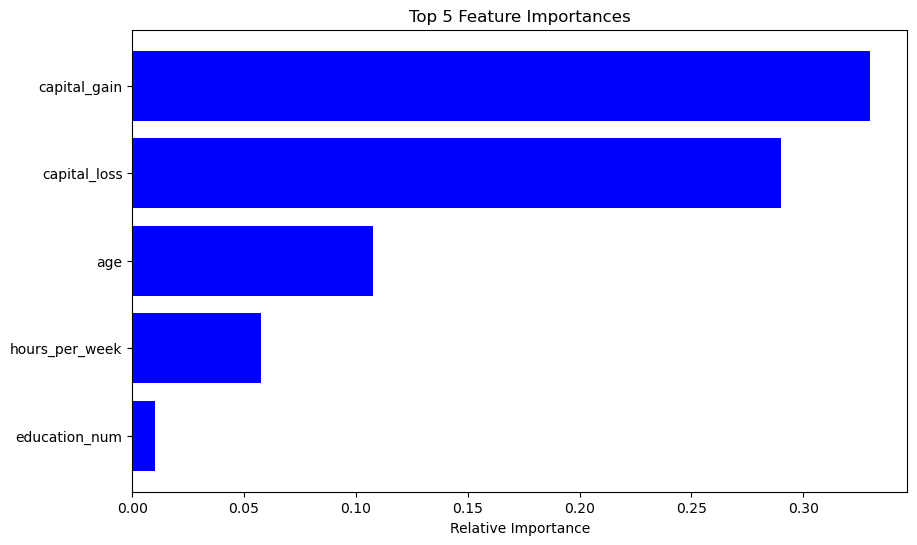

Top 5 Features:
capital_gain: 0.3300
capital_loss: 0.2900
age: 0.1075
hours_per_week: 0.0575
education_num: 0.0100


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming best_ada_classifier is the trained AdaBoost model
# Get feature importances
feature_importances = best_ada_classifier.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(feature_importances)[-5:][::-1]  # Reverse to make the plot more intuitive

# Create a plot of feature importances
plt.figure(figsize=(10, 6))
plt.title('Top 5 Feature Importances')
plt.barh(np.arange(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(np.arange(len(indices)), [X_encoded.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert axis to have the highest importance on top
plt.show()

# Alternatively, print them as a list
print("Top 5 Features:")
for i in indices:
    print(f"{X_encoded.columns[i]}: {feature_importances[i]:.4f}")


f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [22]:
# Predict the classes for the training data
y_train_pred = best_ada_classifier.predict(X_train)

# Calculate and print the classification report for the training data
train_class_report = classification_report(y_train, y_train_pred)
print("Classification Report for Training Data:\n", train_class_report)


Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.78      0.66      0.71      5527

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



# 4. Gradient Boosting Classifier - GridSearch:

a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:

n_estimators: 100,200, 300 & 400
learning_rate: choose 3 learning rates of your choice
max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)
Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

This run took 6.5 minutes for your TA.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.05, 0.1, 0.2],  # Example rates; feel free to adjust
    'max_depth': [1, 2]
}

# Initialize GridSearchCV
grid_search_gbc = GridSearchCV(gbc, param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search_gbc.fit(X_train, y_train)  # Fit GridSearchCV to the training data

# Output the best parameters and the best score
print("Best parameters:", grid_search_gbc.best_params_)
print("Best ROC AUC score:", grid_search_gbc.best_score_)

# Get the best estimator
best_gbc = grid_search_gbc.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=100; total time=   1.8s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=100; total time=   1.4s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=100; total time=   1.6s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=100; total time=   2.2s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=200; total time=   3.3s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=200; total time=   3.8s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=200; total time=   3.4s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=200; total time=   2.9s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=200; total time=   2.8s
[CV] END ..learning_rate=0.05, max_depth=1, n_estimators=300; total time=   4.2s
[CV] END ..learning_rate=0.05, max_depth=1, n_e

[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=100; total time=   3.0s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=100; total time=   2.6s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=100; total time=   2.5s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=100; total time=   2.8s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=200; total time=   5.3s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=200; total time=   6.8s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=200; total time=   8.1s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=200; total time=   7.2s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=200; total time=   5.9s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=300; total time=  13.5s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=300; total time=   9.9s
[CV] END ...learning_rate=0.2, max_depth=2, n_estimators=300; total time=   8.0s
[CV] END ...learning_rate=0.

b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).



In [24]:
# Predict the classes and probabilities for the test data
y_pred_gbc = best_gbc.predict(X_test)
y_proba_gbc = best_gbc.predict_proba(X_test)[:, 1]


In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix and print it
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
print("Confusion Matrix:\n", conf_matrix_gbc)

# Calculate and print the classification report
class_report_gbc = classification_report(y_test, y_pred_gbc)
print("Classification Report:\n", class_report_gbc)


Confusion Matrix:
 [[7030  425]
 [ 814 1500]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.65      0.71      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769



d) Calculate the AUC score


In [26]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC score
auc_score_gbc = roc_auc_score(y_test, y_proba_gbc)
print("AUC Score:", auc_score_gbc)


AUC Score: 0.9259131568436837



e) Identify the top 5 features. Feel free to print a list OR to make a plot.

f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

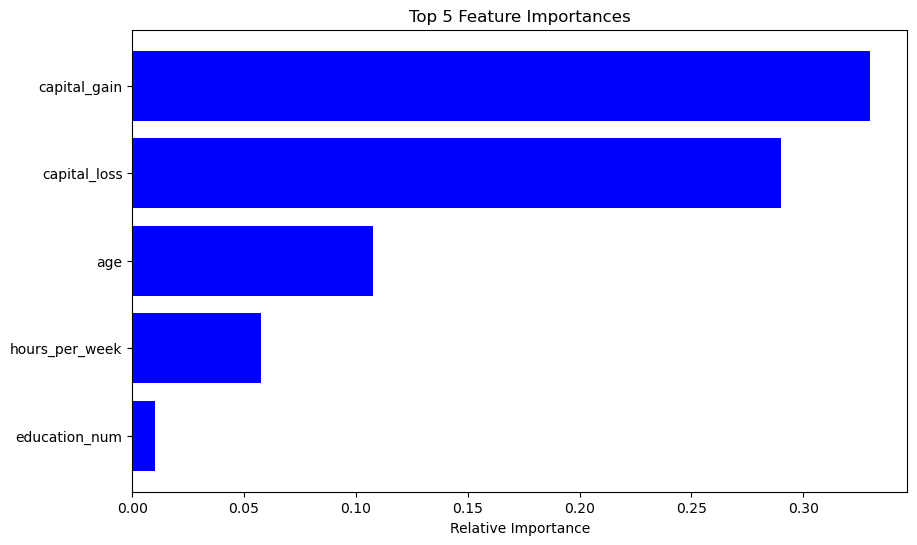

Top 5 Features:
capital_gain: 0.3300
capital_loss: 0.2900
age: 0.1075
hours_per_week: 0.0575
education_num: 0.0100


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances and sort them
feature_importances_gbc = best_gbc.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(feature_importances)[-5:][::-1]  # Reverse to make the plot more intuitive

# Create a plot of feature importances
plt.figure(figsize=(10, 6))
plt.title('Top 5 Feature Importances')
plt.barh(np.arange(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(np.arange(len(indices)), [X_encoded.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert axis to have the highest importance on top
plt.show()

# Alternatively, print them as a list
print("Top 5 Features:")
for i in indices:
    print(f"{X_encoded.columns[i]}: {feature_importances[i]:.4f}")


In [29]:
# Predict the classes for the training data
y_train_pred_gbc = best_gbc.predict(X_train)

# Calculate and print the classification report for the training data
train_class_report_gbc = classification_report(y_train, y_train_pred_gbc)
print("Classification Report for Training Data:\n", train_class_report_gbc)


Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92     17265
           1       0.81      0.67      0.73      5527

    accuracy                           0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792



# 5. XGBoost - RandomizedSearchCV

Repeat 4(a) - 4(f) with xgboost and RandomizedSearchCV.

For 4a use the following parameters: 

n_estimators: 100-1000 in increments of 50  (i.e. 100,150,200,.....1000)
learning_rate: 0.1 - 1.6 in increments of 0.1
max_depth: 1, 2
gamma: 0 - 5 in increments of 0.25
Note: For parameters with increments please don't feel the need to type each value by hand. There are better ways to handle this. Post in discussion thread if you are struggling.

For RandomizedSearchCV make sure to still use cv = 5 and for scoring use "roc_auc".

In [30]:
# a) Setup XGBoost with RandomizedSearchCV
!pip install xgboost


In [31]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(100, 1050, 50),
    'learning_rate': np.arange(0.1, 1.7, 0.1),
    'max_depth': [1, 2],
    'gamma': np.arange(0, 5.25, 0.25)
}

# Initialize RandomizedSearchCV with the XGBoost classifier, parameter grid, and necessary settings
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=param_grid, n_iter=100, cv=5, scoring='roc_auc', verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Output the best parameters and the best score
print("Best parameters:", random_search.best_params_)
print("Best ROC AUC score:", random_search.best_score_)

# Get the best estimator
best_xgb = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   3.0s
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   3.0s
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   1.8s
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   1.8s
[CV] END gamma=2.75, learning_rate=1.6, max_depth=1, n_estimators=700; total time=   1.8s
[CV] END gamma=0.25, learning_rate=0.7000000000000001, max_depth=2, n_estimators=350; total time=   1.3s
[CV] END gamma=0.25, learning_rate=0.7000000000000001, max_depth=2, n_estimators=350; total time=   1.2s
[CV] END gamma=0.25, learning_rate=0.7000000000000001, max_depth=2, n_estimators=350; total time=   1.4s
[CV] END gamma=0.25, learning_rate=0.7000000000000001, max_depth=2, n_estimators=350; total time=   2.6s
[CV] END gamma=0.25, learning_rate=0.7000000000000001, max_depth=2,

[CV] END gamma=0.25, learning_rate=0.5, max_depth=1, n_estimators=550; total time=   1.4s
[CV] END gamma=4.25, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100; total time=   0.7s
[CV] END gamma=4.25, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100; total time=   0.8s
[CV] END gamma=4.25, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100; total time=   1.0s
[CV] END gamma=4.25, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100; total time=   0.7s
[CV] END gamma=4.25, learning_rate=0.7000000000000001, max_depth=2, n_estimators=100; total time=   0.7s
[CV] END gamma=2.75, learning_rate=0.7000000000000001, max_depth=2, n_estimators=800; total time=   2.4s
[CV] END gamma=2.75, learning_rate=0.7000000000000001, max_depth=2, n_estimators=800; total time=   1.9s
[CV] END gamma=2.75, learning_rate=0.7000000000000001, max_depth=2, n_estimators=800; total time=   1.8s
[CV] END gamma=2.75, learning_rate=0.7000000000000001, max_depth=2, n_

[CV] END gamma=1.0, learning_rate=0.9, max_depth=1, n_estimators=650; total time=   1.5s
[CV] END gamma=1.0, learning_rate=0.9, max_depth=1, n_estimators=650; total time=   2.6s
[CV] END gamma=3.75, learning_rate=0.2, max_depth=1, n_estimators=550; total time=   1.5s
[CV] END gamma=3.75, learning_rate=0.2, max_depth=1, n_estimators=550; total time=   1.5s
[CV] END gamma=3.75, learning_rate=0.2, max_depth=1, n_estimators=550; total time=   1.5s
[CV] END gamma=3.75, learning_rate=0.2, max_depth=1, n_estimators=550; total time=   1.5s
[CV] END gamma=3.75, learning_rate=0.2, max_depth=1, n_estimators=550; total time=   1.5s
[CV] END gamma=4.0, learning_rate=0.8, max_depth=1, n_estimators=300; total time=   1.4s
[CV] END gamma=4.0, learning_rate=0.8, max_depth=1, n_estimators=300; total time=   1.2s
[CV] END gamma=4.0, learning_rate=0.8, max_depth=1, n_estimators=300; total time=   0.9s
[CV] END gamma=4.0, learning_rate=0.8, max_depth=1, n_estimators=300; total time=   0.9s
[CV] END gamma=4

[CV] END gamma=3.5, learning_rate=0.8, max_depth=1, n_estimators=800; total time=   1.7s
[CV] END gamma=3.5, learning_rate=0.8, max_depth=1, n_estimators=800; total time=   1.9s
[CV] END gamma=3.5, learning_rate=0.8, max_depth=1, n_estimators=800; total time=   1.8s
[CV] END gamma=3.5, learning_rate=0.8, max_depth=1, n_estimators=800; total time=   1.9s
[CV] END gamma=4.25, learning_rate=0.6, max_depth=2, n_estimators=600; total time=   1.4s
[CV] END gamma=4.25, learning_rate=0.6, max_depth=2, n_estimators=600; total time=   1.8s
[CV] END gamma=4.25, learning_rate=0.6, max_depth=2, n_estimators=600; total time=   1.8s
[CV] END gamma=4.25, learning_rate=0.6, max_depth=2, n_estimators=600; total time=   1.5s
[CV] END gamma=4.25, learning_rate=0.6, max_depth=2, n_estimators=600; total time=   1.5s
[CV] END gamma=4.0, learning_rate=1.4000000000000001, max_depth=2, n_estimators=700; total time=   1.7s
[CV] END gamma=4.0, learning_rate=1.4000000000000001, max_depth=2, n_estimators=700; total

[CV] END gamma=3.25, learning_rate=0.9, max_depth=1, n_estimators=1000; total time=   3.9s
[CV] END gamma=1.25, learning_rate=0.30000000000000004, max_depth=2, n_estimators=950; total time=   2.9s
[CV] END gamma=1.25, learning_rate=0.30000000000000004, max_depth=2, n_estimators=950; total time=   2.2s
[CV] END gamma=1.25, learning_rate=0.30000000000000004, max_depth=2, n_estimators=950; total time=   2.0s
[CV] END gamma=1.25, learning_rate=0.30000000000000004, max_depth=2, n_estimators=950; total time=   2.1s
[CV] END gamma=1.25, learning_rate=0.30000000000000004, max_depth=2, n_estimators=950; total time=   2.1s
[CV] END gamma=4.0, learning_rate=1.2000000000000002, max_depth=1, n_estimators=150; total time=   0.7s
[CV] END gamma=4.0, learning_rate=1.2000000000000002, max_depth=1, n_estimators=150; total time=   0.7s
[CV] END gamma=4.0, learning_rate=1.2000000000000002, max_depth=1, n_estimators=150; total time=   0.7s
[CV] END gamma=4.0, learning_rate=1.2000000000000002, max_depth=1, 

[CV] END gamma=0.25, learning_rate=1.1, max_depth=1, n_estimators=450; total time=   1.7s
[CV] END gamma=0.25, learning_rate=1.1, max_depth=1, n_estimators=450; total time=   1.6s
[CV] END gamma=0.25, learning_rate=1.1, max_depth=1, n_estimators=450; total time=   1.6s
[CV] END gamma=0.25, learning_rate=1.1, max_depth=1, n_estimators=450; total time=   1.5s
[CV] END gamma=0.25, learning_rate=1.1, max_depth=1, n_estimators=450; total time=   2.9s
[CV] END gamma=4.5, learning_rate=1.6, max_depth=2, n_estimators=150; total time=   1.2s
[CV] END gamma=4.5, learning_rate=1.6, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END gamma=4.5, learning_rate=1.6, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END gamma=4.5, learning_rate=1.6, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END gamma=4.5, learning_rate=1.6, max_depth=2, n_estimators=150; total time=   0.8s
[CV] END gamma=5.0, learning_rate=1.6, max_depth=1, n_estimators=750; total time=   1.7s
[CV] END gamma=5

In [32]:
# b) Predict on test data using the best estimator
# Predict the classes and probabilities for the test data
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# c) Calculate the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix and print it
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:\n", conf_matrix_xgb)

# Calculate and print the classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report:\n", class_report_xgb)


Confusion Matrix:
 [[7024  431]
 [ 823 1491]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      7455
           1       0.78      0.64      0.70      2314

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



AUC Score: 0.925862782572705


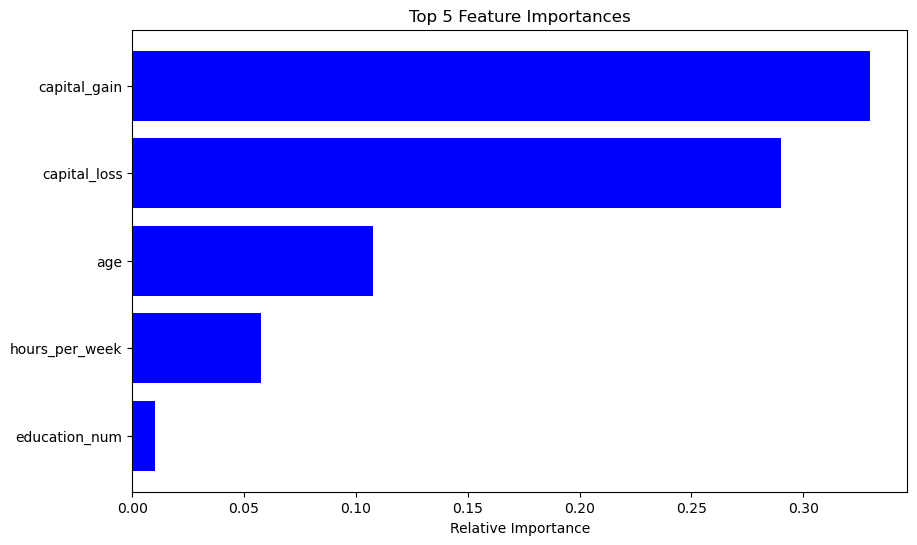

Top 5 Features:
capital_gain: 0.3300
capital_loss: 0.2900
age: 0.1075
hours_per_week: 0.0575
education_num: 0.0100


In [34]:
# d) Calculate the AUC score
from sklearn.metrics import roc_auc_score

# Calculate the AUC score
auc_score_xgb = roc_auc_score(y_test, y_proba_xgb)
print("AUC Score:", auc_score_xgb)

# e) Identify the top 5 features
# Get feature importances and sort them
feature_importances_xgb = best_xgb.feature_importances_

# Get the indices of the top 5 features
indices = np.argsort(feature_importances)[-5:][::-1]  # Reverse to make the plot more intuitive

# Create a plot of feature importances
plt.figure(figsize=(10, 6))
plt.title('Top 5 Feature Importances')
plt.barh(np.arange(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(np.arange(len(indices)), [X_encoded.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Invert axis to have the highest importance on top
plt.show()

# Alternatively, print them as a list
print("Top 5 Features:")
for i in indices:
    print(f"{X_encoded.columns[i]}: {feature_importances[i]:.4f}")


In [35]:
# f) Predict for the train data and check for overfitting
# Predict the classes for the training data
y_train_pred_xgb = best_xgb.predict(X_train)

# Calculate and print the classification report for the training data
train_class_report_xgb = classification_report(y_train, y_train_pred_xgb)
print("Classification Report for Training Data:\n", train_class_report_xgb)



Classification Report for Training Data:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     17265
           1       0.79      0.66      0.72      5527

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792



# 6. Moving into Conceptual Problems:

## a) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?). 

The Gini Index calculates impurity as \(1 - \sum (p_i^2)\), aiming to maximize the purity of nodes, leading to models that efficiently categorize the data by minimizing misclassification. By choosing splits that minimize the Gini index, RandomForest aims to create highly pure nodes, thus enhancing the overall predictive accuracy and robustness of the model by effectively managing the classification of the data.

## b) Describe how Random Forest is different from bagging & why this difference can yield improved results.

Bagging is combination od Bootstrap+ aggregation – general purpose procedure for reducing the variance of a model. This works by fitting multiple models to bootstrapped samples from training data set.It is bettern than tree models in that boostrapped training sets and **average the resulting predictions**.Random Forest is a specialized type of bagging that primarily uses decision trees as its base models and introduces additional randomness into the model-building process, improving over traditional bagging in two significant ways:

De-correlating Trees: Whereas standard bagging uses the same set of features to split nodes in each tree, Random Forest randomly selects a subset of features at each split.
Reduction in Variance Without Increasing Bias: By de-correlating the trees, Random Forest can reduce the variance more effectively than standard bagging without a corresponding increase in bias. 


## c) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

max_depth parameter in Random Forest plays a crucial role in controlling the complexity of the model.
high max_depth:can improve the model's ability to capture complex patterns in the data, potentially leading to lower bias. However, if the trees fit too closely to noise and anomalies in the training data, overfitting might happen
lower max_depth :limits the growth of the trees, simplifying the model, which can increase bias but generally leads to better generalization and lower variance, making the model more robust to new, unseen data.



## d)What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.

alpha parameter is weight of a given weak classifier in the final decision of the ensemble model. For example, classifiers with lower error rates are assigned higher alpha values. This can adjust the contribution of each weak learner, ensuring that better-performing models have a greater impact on the ensemble's predictions

## e) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.

In AdaBoost, the final predicted class is determined through a weighted majority voting process where each weak classifier's vote is weighted by its corresponding alpha value, which reflects the classifier's accuracy. Alpha is calculated such that classifiers with lower error rates have higher alpha values, giving them more influence on the final decision. The overall prediction is the sign of the sum of these weighted votes, ensuring that more accurate classifiers have a greater impact on the outcome.

## f) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?

In Gradient Boosting, the `max_depth` parameter determines the depth of the trees and is crucial for controlling model complexity and preventing overfitting. Setting an optimal `max_depth` helps balance bias and variance, ensuring trees are complex enough to model relevant interactions but not so detailed that they capture noise and fail to generalize. Tuning this parameter is essential for achieving the best performance on unseen data, as it directly affects the model's ability to learn generalized patterns rather than overfitting to the training data.

## g) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).

Yes. ['age, 'capital_gain'] are the top 5 predictors for all three models. since salary goes up wirh again anf capticsl gain, the result makes more sense


## h) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.

Gradiet boosting outperformed with AUC Score: 0.92 from that gradient technique is more robust to nisy dat and outliers, as well as being less prone to overfitting die to the use of msx depth paramaters.

## i) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.



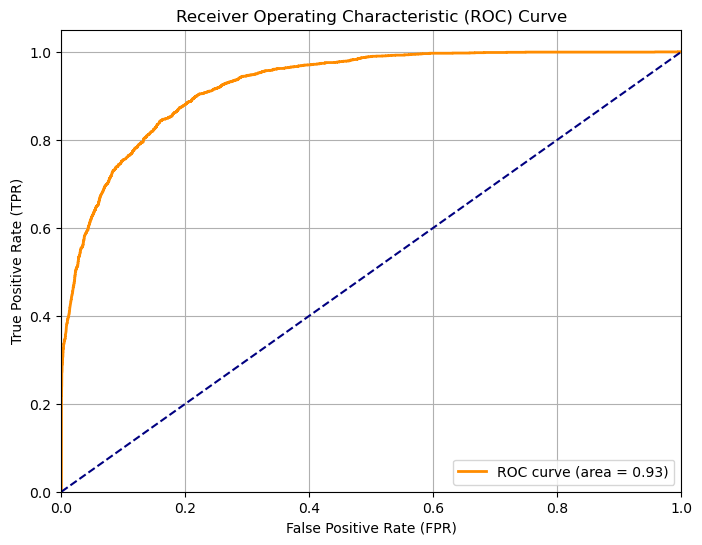

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_proba_gbc)

# Calculate the AUC (Area Under the Curve) from the FPR and TPR
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
